In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from huggingface_hub import HfApi

In [3]:
datasets = load_dataset('emotion')
datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [30]:
splits = [*datasets.keys()]
df = {split: pd.DataFrame(datasets[split]) for split in splits}
df['train'].head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


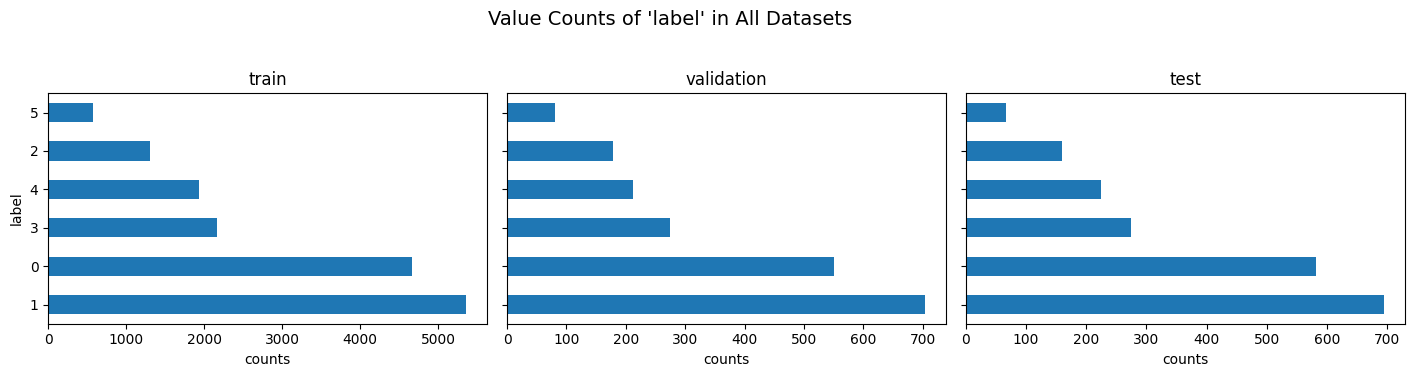

In [59]:
def plot_value_counts(df, col='label'):
    # Create subplots with the number of columns equal to the number of DataFrames
    fig, axes = plt.subplots(1, len(df.values()), figsize=(5 * len(df.values()), 4), sharey=True)

    # Loop through DataFrames and plot value counts
    for i, df_i in enumerate(df.items()):    
        split, df_split = df_i
        value_counts = df_split[col].value_counts()
        value_counts.plot(kind='barh', ax=axes[i])
        axes[i].set_title(split)
        axes[i].set_xlabel('counts')

    # Set common y-label for the figure
    # fig.text(0.04, 0.5, 'Label', va='center', rotation='vertical', fontsize=12)
    plt.suptitle(f"Value Counts of '{col}' in All Datasets", fontsize=14)

    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # Adjust layout
    plt.show()

plot_value_counts(df)

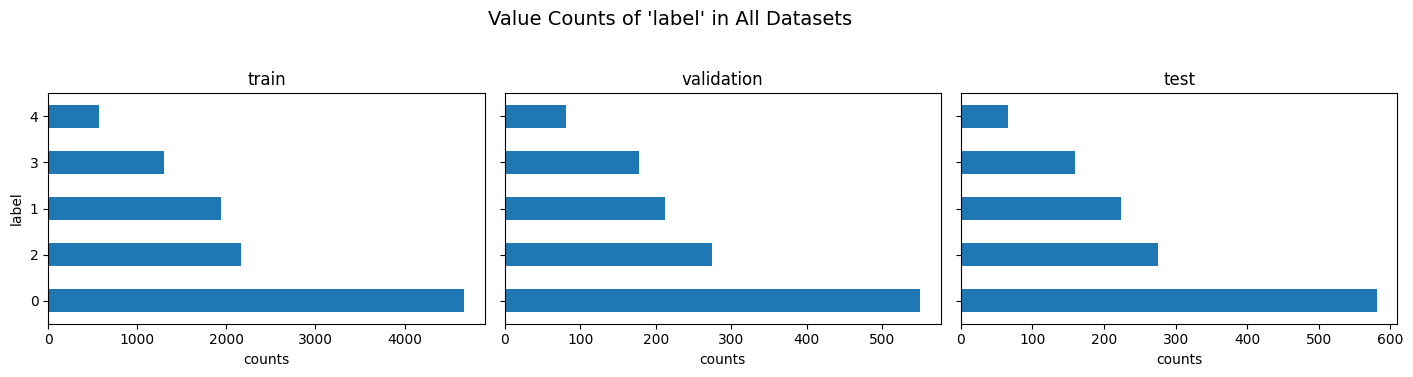

In [73]:
df_no_love = {split: df_split[df_split['label'] != 1].copy() for split, df_split in df.items()}
for split in df_no_love.keys():
    df_no_love[split]['label'] = pd.factorize(df_no_love[split]['label'])[0]
plot_value_counts(df_no_love, col='label')

In [74]:
# Save preprocessed data
save_dir = './data/emotion-no-love'

!mkdir -p $save_dir

for split, df_split in df_no_love.items():
    df_split.to_csv(os.path.join(save_dir, f'{split}.csv'), index=False)

print("Saved to:", save_dir)

Saved to: ./data/emotion-no-love


In [76]:
hf_api = HfApi()
hf_api.upload_folder(
    repo_id=f'alxxtexxr/emotion-no-love',
    repo_type='dataset',
    folder_path=save_dir,
)

CommitInfo(commit_url='https://huggingface.co/datasets/alxxtexxr/emotion-no-love/commit/979db954dd82f906c1714ac6a5893cb46ca386cc', commit_message='Upload folder using huggingface_hub', commit_description='', oid='979db954dd82f906c1714ac6a5893cb46ca386cc', pr_url=None, pr_revision=None, pr_num=None)